# LSTM modeli

In [19]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Rastgele tohumları ayarlama
def set_seeds(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)


# Veriyi yükleme ve ön işleme
df = pd.read_excel("rainfall-and-daily-consumption-data-on-istanbul-dams.xlsx")

df = df[['Tarih', 'İstanbul günlük tüketim(m³/gün)']]
df = df.set_index("Tarih")
df.index = pd.to_datetime(df.index)
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'] // 100
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'].astype(float)
df = np.log(df)

# Eğitim ve test veri setlerini ayırma
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]

# Özellikleri oluşturma
def create_features(df):
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

df = create_features(df)
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'İstanbul günlük tüketim(m³/gün)'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

# Veriyi normalize etme
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# LSTM için veriyi yeniden şekillendirme
X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM modelini oluşturma
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Erken durdurma tanımlama
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2, shuffle=False, callbacks=[early_stopping])

# Test verileri üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Tahminleri orijinal ölçeğe döndürme
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_orig = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# MSE ve RMSE değerlerini hesaplama
mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))

# MAE hesaplama
mae = mean_absolute_error(y_test_orig, y_pred_orig)
print("Mean Absolute Error (MAE):", mae)

# MAPE hesaplama
mape = mean_absolute_percentage_error(y_test_orig, y_pred_orig) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Epoch 1/100
118/118 - 2s - loss: 0.0578 - val_loss: 0.0245 - 2s/epoch - 16ms/step
Epoch 2/100
118/118 - 0s - loss: 0.0242 - val_loss: 0.0153 - 230ms/epoch - 2ms/step
Epoch 3/100
118/118 - 0s - loss: 0.0187 - val_loss: 0.0125 - 233ms/epoch - 2ms/step
Epoch 4/100
118/118 - 0s - loss: 0.0165 - val_loss: 0.0115 - 231ms/epoch - 2ms/step
Epoch 5/100
118/118 - 0s - loss: 0.0155 - val_loss: 0.0110 - 233ms/epoch - 2ms/step
Epoch 6/100
118/118 - 0s - loss: 0.0147 - val_loss: 0.0105 - 226ms/epoch - 2ms/step
Epoch 7/100
118/118 - 0s - loss: 0.0140 - val_loss: 0.0098 - 236ms/epoch - 2ms/step
Epoch 8/100
118/118 - 0s - loss: 0.0133 - val_loss: 0.0092 - 249ms/epoch - 2ms/step
Epoch 9/100
118/118 - 0s - loss: 0.0126 - val_loss: 0.0086 - 256ms/epoch - 2ms/step
Epoch 10/100
118/118 - 0s - loss: 0.0119 - val_loss: 0.0081 - 259ms/epoch - 2ms/step
Epoch 11/100
118/118 - 0s - loss: 0.0113 - val_loss: 0.0077 - 248ms/epoch - 2ms/step
Epoch 12/100
118/118 - 0s - loss: 0.0107 - val_loss: 0.0073 - 255ms/epoch - 

In [20]:
LstmYPRED= y_pred_orig

In [21]:
LstmYPRED

array([[10.286347 ],
       [10.289191 ],
       [10.299717 ],
       [10.3025255],
       [10.287773 ],
       [10.290514 ],
       [10.293268 ],
       [10.296036 ],
       [10.298817 ],
       [10.301611 ],
       [10.304417 ],
       [10.289683 ],
       [10.292422 ],
       [10.295175 ],
       [10.297939 ],
       [10.300719 ],
       [10.303511 ],
       [10.306315 ],
       [10.291601 ],
       [10.294338 ],
       [10.297088 ],
       [10.299851 ],
       [10.302628 ],
       [10.305418 ],
       [10.308221 ],
       [10.293526 ],
       [10.29626  ],
       [10.299009 ],
       [10.30177  ],
       [10.304544 ],
       [10.307333 ],
       [10.310132 ],
       [10.295458 ],
       [10.30632  ],
       [10.309006 ],
       [10.311706 ],
       [10.314419 ],
       [10.317146 ],
       [10.319887 ],
       [10.305522 ],
       [10.308282 ],
       [10.310966 ],
       [10.313663 ],
       [10.316375 ],
       [10.3191   ],
       [10.321838 ],
       [10.307441 ],
       [10.31

In [22]:
print(sum(LstmYPRED))

[9726.863]


In [23]:
len(LstmYPRED)

943

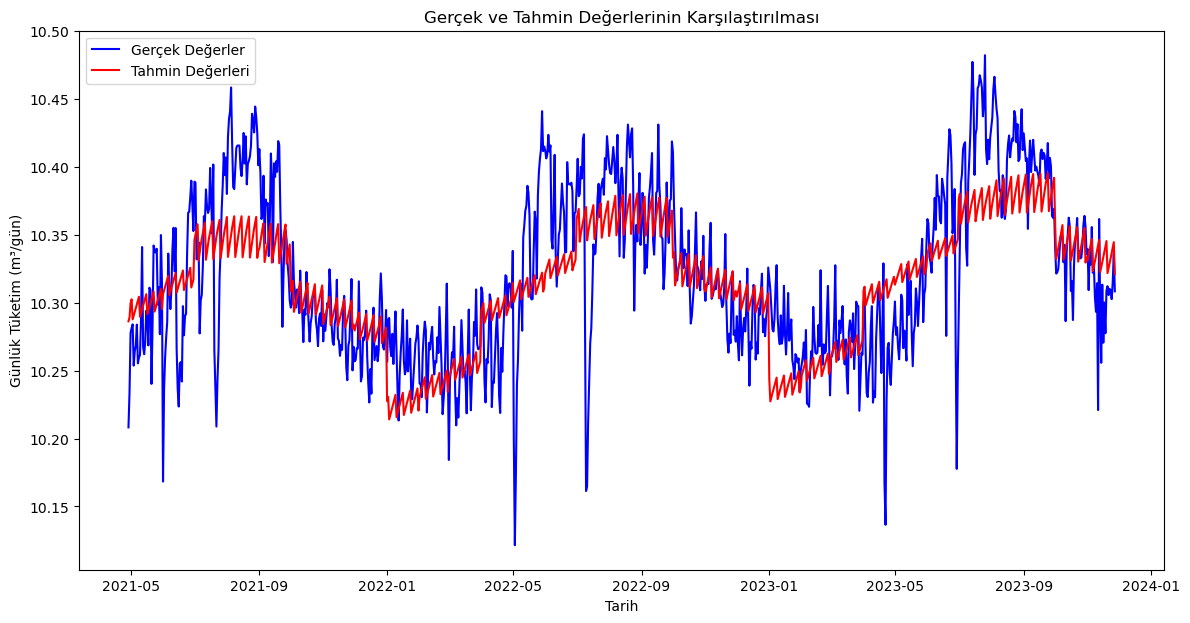

In [24]:
# Gerçek ve tahmin değerleri birleştirme
results = pd.DataFrame({'Tarih': test.index, 'Gerçek': y_test_orig.flatten(), 'Tahmin': y_pred_orig.flatten()})
results = results.set_index('Tarih')

# Görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Gerçek'], label='Gerçek Değerler', color='blue')
plt.plot(results.index, results['Tahmin'], label='Tahmin Değerleri', color='red')
plt.title('Gerçek ve Tahmin Değerlerinin Karşılaştırılması')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.show()


In [25]:
# Son 10 günlük veriyi alarak tahmin yapma
last_10_days = df[-10:]
last_10_days = create_features(last_10_days)

X_future = last_10_days[FEATURES]

# Veriyi normalize etme
X_future_normalized = scaler_X.transform(X_future)

# Veriyi LSTM modeli için uygun formata dönüştürme
X_future_formatted = np.array(X_future_normalized).reshape((X_future_normalized.shape[0], 1, X_future_normalized.shape[1]))

# Gelecek 10 gün için tahmin yapma
future_predictions = model.predict(X_future_formatted)

# Tahminleri orijinal ölçeğe döndürme
future_predictions_orig = scaler_y.inverse_transform(future_predictions.reshape(-1, 1))


1/1 [==============================] - 0s 18ms/step


In [26]:
from datetime import datetime, timedelta

# Son tahmin edilen tarihi alınması
last_date = df.index[-1]

# Gelecek 10 günün tarihlerini oluşturma
future_dates = [last_date + timedelta(days=i) for i in range(1, 11)]

# Tahmin edilen su miktarını ekrana yazdırma
for i in range(len(future_predictions_orig)):
    print(f"Tahmin edilen su miktarı {future_dates[i].strftime('%Y-%m-%d')}: {future_predictions_orig[i][0]} m³/gün")


Tahmin edilen su miktarı 2023-11-28: 10.341657638549805 m³/gün
Tahmin edilen su miktarı 2023-11-29: 10.345468521118164 m³/gün
Tahmin edilen su miktarı 2023-11-30: 10.321869850158691 m³/gün
Tahmin edilen su miktarı 2023-12-01: 10.325366020202637 m³/gün
Tahmin edilen su miktarı 2023-12-02: 10.329010963439941 m³/gün
Tahmin edilen su miktarı 2023-12-03: 10.332801818847656 m³/gün
Tahmin edilen su miktarı 2023-12-04: 10.336739540100098 m³/gün
Tahmin edilen su miktarı 2023-12-05: 10.340819358825684 m³/gün
Tahmin edilen su miktarı 2023-12-06: 10.344627380371094 m³/gün
Tahmin edilen su miktarı 2023-12-07: 10.321117401123047 m³/gün


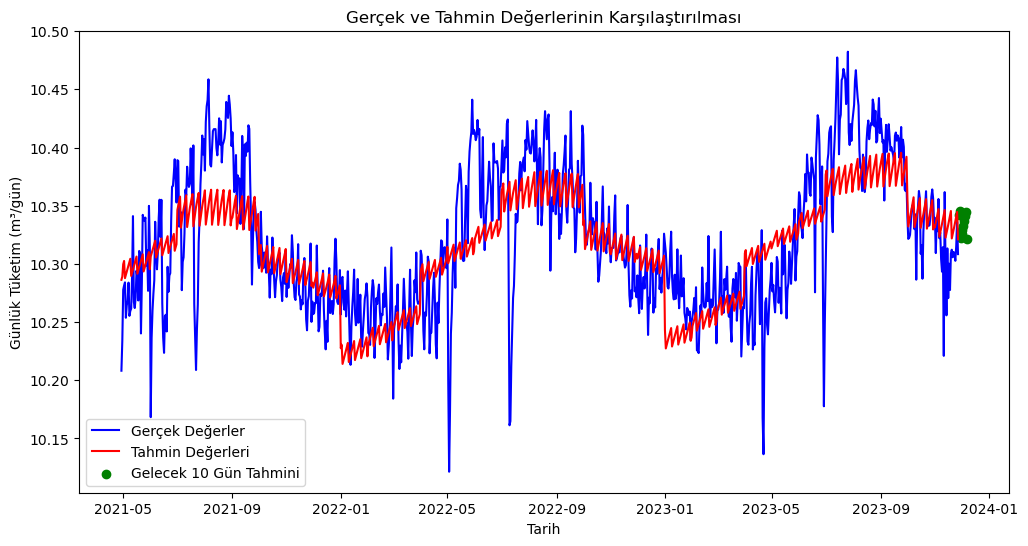

In [27]:
# Tahmin edilen su miktarlarını ve tarihleri içeren bir DataFrame oluşturma
future_results = pd.DataFrame({'Tarih': future_dates, 'Tahmin': future_predictions_orig.flatten()})
future_results = future_results.set_index('Tarih')

# Gelecek 10 gün boyunca tahmin edilen su miktarlarının görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Gerçek'], label='Gerçek Değerler', color='blue')
plt.plot(results.index, results['Tahmin'], label='Tahmin Değerleri', color='red')
plt.scatter(future_results.index, future_results['Tahmin'], color='green', label='Gelecek 10 Gün Tahmini')
plt.title('Gerçek ve Tahmin Değerlerinin Karşılaştırılması')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.show()


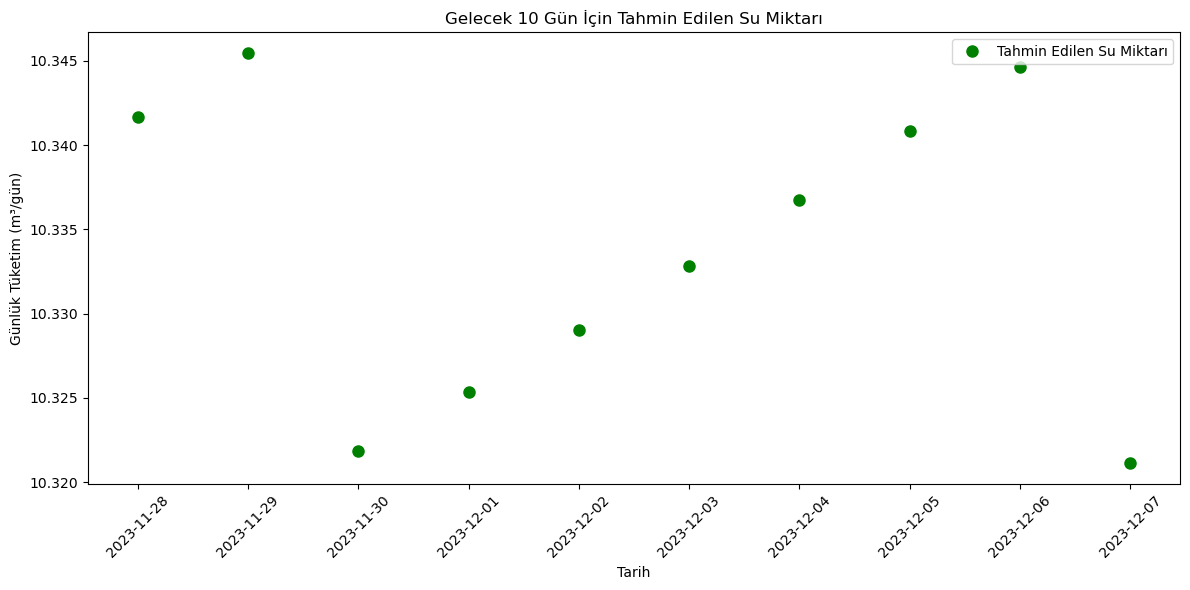

In [28]:
# Gelecek 10 gün boyunca tahmin edilen su miktarlarının detaylı nokta görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.plot(future_results.index, future_results['Tahmin'], 'go', markersize=8, label='Tahmin Edilen Su Miktarı')
plt.title('Gelecek 10 Gün İçin Tahmin Edilen Su Miktarı')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")  # Uyarıları görmezden gel

# Son tahmin edilen tarihi alınması
last_date = df.index[-1]

# Gelecek 365 gün boyunca tahmin yapma
future_predictions_365 = []
future_dates_365 = []
for i in range(1, 366):  # Her adımda bir sonraki günün tahmini yapılır
    # Tahmin yapılacak tarih için özelliklerin oluşturulması
    future_date = last_date + timedelta(days=i)
    future_dates_365.append(future_date)
    future_features = {'dayofweek': future_date.dayofweek,
                       'quarter': future_date.quarter,
                       'month': future_date.month,
                       'year': future_date.year,
                       'dayofyear': future_date.timetuple().tm_yday}
    
    # Veriyi normalize etme
    future_features_normalized = scaler_X.transform([list(future_features.values())])

    # Veriyi LSTM modeli için uygun formata dönüştürme
    future_features_formatted = np.array(future_features_normalized).reshape((1, 1, len(FEATURES)))

    # Tahmin yapma
    future_prediction = model.predict(future_features_formatted)

    # Tahmin edilen su miktarını orijinal ölçeğe döndürme ve listeye ekleme
    future_prediction_orig = scaler_y.inverse_transform(future_prediction.reshape(-1, 1))
    future_predictions_365.append(future_prediction_orig[0][0])

# Gelecek 365 gün boyunca tahmin edilen su miktarlarını içeren bir DataFrame oluşturma
future_results_365 = pd.DataFrame({'Tarih': future_dates_365, 'Tahmin': future_predictions_365})
future_results_365 = future_results_365.set_index('Tarih')
future_results_365

1/1 [==============================] - 0s 27ms/step


,Tahmin
Tarih,
2023-11-28,10.324594
2023-11-29,10.328219
2023-11-30,10.331994
2023-12-01,10.329179
2023-12-02,10.332542
...,...
2024-11-22,10.356187
2024-11-23,10.360237
2024-11-24,10.364426


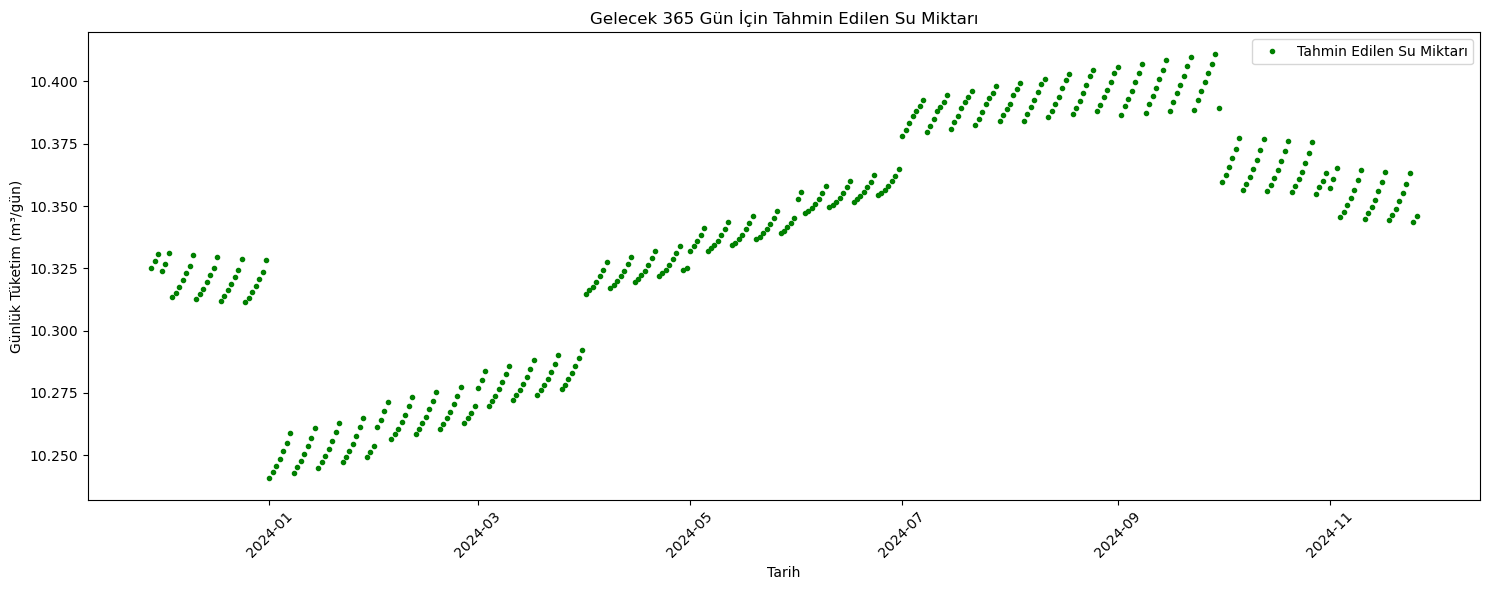

In [21]:
# Gelecek 365 gün boyunca tahmin edilen su miktarlarının detaylı nokta görselleştirilmesi
plt.figure(figsize=(15, 6))
plt.plot(future_results_365.index, future_results_365['Tahmin'], 'go', markersize=3, label='Tahmin Edilen Su Miktarı')
plt.title('Gelecek 365 Gün İçin Tahmin Edilen Su Miktarı')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
future_results_365

,Tahmin
Tarih,
2023-11-28,10.325261
2023-11-29,10.327785
2023-11-30,10.330736
2023-12-01,10.323747
2023-12-02,10.326665
...,...
2024-11-22,10.355245
2024-11-23,10.358995
2024-11-24,10.363126
